In [1]:
import os
import numpy as np
from PIL import Image

from skimage.io import imread, imshow
from skimage import transform

import cv2


In [28]:
def process_img(img_file, shape = (256,256)):
    img = imread(img_file, plugin='tifffile', as_gray = True)
    img = transform.resize(img, shape)
    #img = img/255
    #img = img.astype(np.uint8)
    return(img)

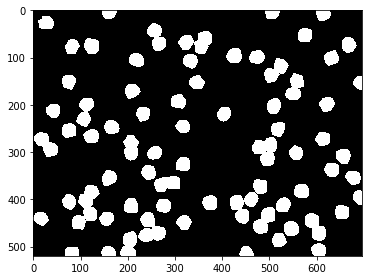

In [109]:
test_img_file = '/home/andy-pohl/Documents/ssc_challenge/ssc-case-study-2019/BBBC_data/mask_creation_images/train/label/class0/SIMCEPImages_A22_C91_F1_s12_w1.TIF'
test_img = cv2.imread(test_img_file)
imshow(test_img)


0.0

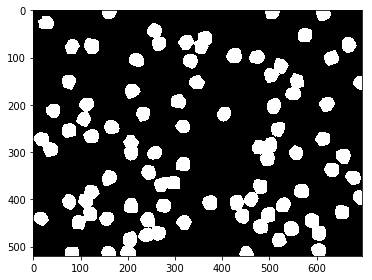

In [117]:
gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
imshow(test_img)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
imshow(thresh)
ret
#ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#thresh = cv2.subtract(255, thresh)

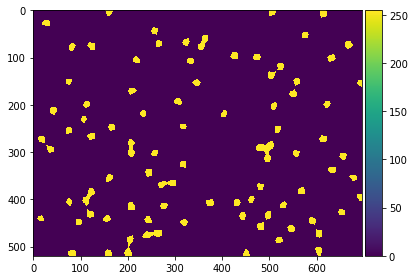

In [125]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
imshow(sure_fg)

# Finding unknown region
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)

In [113]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


In [115]:
markers = cv2.watershed(test_img,markers)
test_img[markers == -1] = [255,0,0]

84

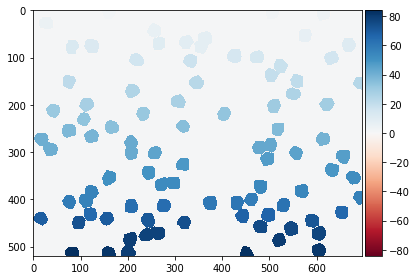

In [116]:
imshow(markers)
markers.max()

In [55]:
markers = cv2.watershed(test_img,markers)
img[markers == -1] = [255,0,0]

error: OpenCV(4.1.0) ../modules/imgproc/src/segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'watershed'


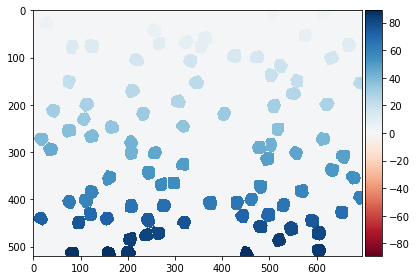

In [94]:
imshow(markers)